In [59]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings 

In [60]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [61]:
df.drop(['id'], axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


<function matplotlib.pyplot.show(close=None, block=None)>

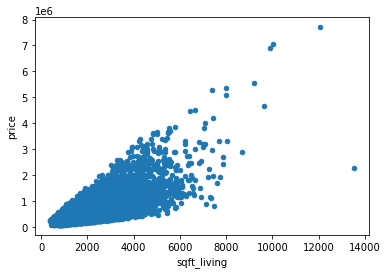

In [62]:
df.plot(kind='scatter', x='sqft_living', y='price')
plt.show

In [63]:
#cells to take out of df - bathrooms, sqft_above, grade,sgft_living15, sgft_lot15, bedrooms

In [64]:
df = df.drop(['bathrooms', 'sqft_above', 'date', 'sqft_living15', 'sqft_lot15', 'bedrooms'], axis=1)

In [65]:
df

,id,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,221900.0,1180,5650,1.0,NaN,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257
1,6414100192,538000.0,2570,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319
2,5631500400,180000.0,770,10000,1.0,0.0,0.0,3,6,0.0,1933,NaN,98028,47.7379,-122.233
3,2487200875,604000.0,1960,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393
4,1954400510,510000.0,1680,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,1530,1131,3.0,0.0,0.0,3,8,0.0,2009,0.0,98103,47.6993,-122.346
21593,6600060120,400000.0,2310,5813,2.0,0.0,0.0,3,8,0.0,2014,0.0,98146,47.5107,-122.362
21594,1523300141,402101.0,1020,1350,2.0,0.0,0.0,3,7,0.0,2009,0.0,98144,47.5944,-122.299
21595,291310100,400000.0,1600,2388,2.0,NaN,0.0,3,8,0.0,2004,0.0,98027,47.5345,-122.069


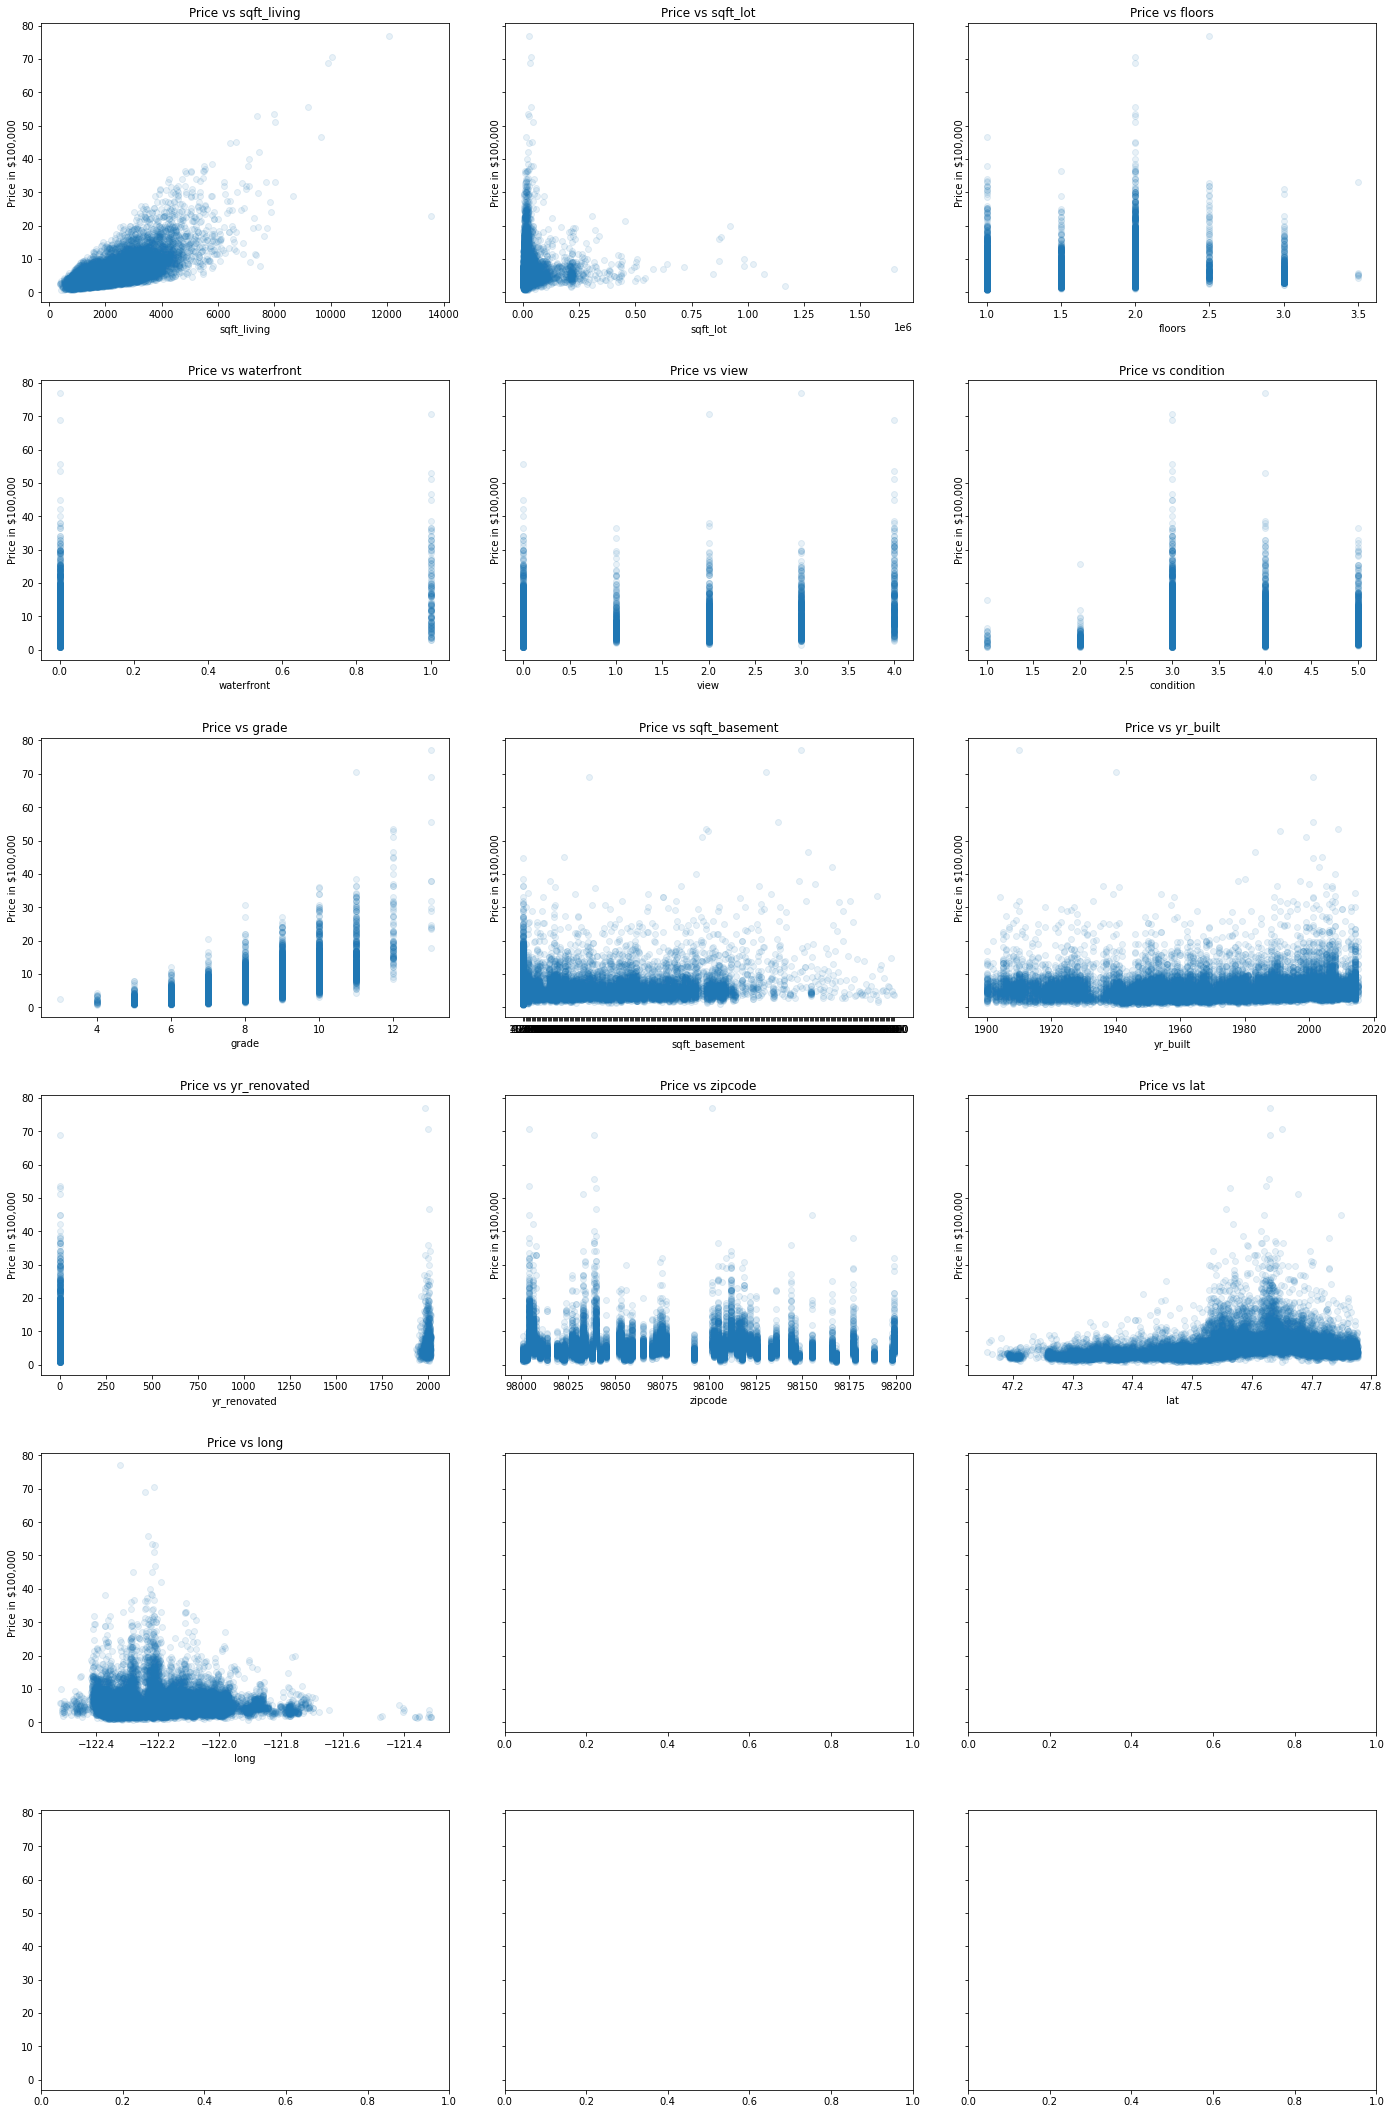

In [66]:
fig, axes = plt.subplots(6, 3, figsize=(20,30), sharey=True)
for ax, column in zip(axes.flatten(), df.columns[2:]):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')
fig.tight_layout(pad=3.0)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     19221 non-null  float64
 6   view           21534 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_basement  21597 non-null  object 
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   17755 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
dtypes: float64(7), int64(7), object(1)
memory usage: 2.5+ MB


In [73]:
df.describe()

,id,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982
std,2.876736e+09,3.673681e+05,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [77]:
df['sqft_basement'].describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [68]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [78]:
mean_basement_no_outliers = df.loc[(df['sqft_basement'] != 4820) | (df['sqft_basement'] != 0), 'sqft_basement'].mean()

In [79]:
df['sqft_basement'] = np.where((df['sqft_basement'] == 4820) | (df['sqft_basement'] == 0), round(mean_basement_no_outliers), df['sqft_basement'])

In [81]:
df['sqft_basement'].describe()

count    21143.000000
mean       468.773826
std        334.452292
min         10.000000
25%        292.000000
50%        292.000000
75%        560.000000
max       4130.000000
Name: sqft_basement, dtype: float64

In [82]:
train = df.drop(['price', 'sqft_living'], axis=1)
test= df['price']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size= 0.3, random_state =42)

In [84]:
regr = LinearRegression()

In [85]:
regr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').